# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

# YOUR CODE HERE
df = pd.read_csv(airbnbDataSet_filename,header=0)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [3]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. The data set I am using is the airbnb data set
2. I will be predicting whether the airbnb is instant bookable or not
3. This would be a supervicsed learning problem and would be a classification (specifically a binary classification) problem since the label is True/False.
4. So far we will use all features, but during the inspection I plan to remove irrelevant or redundant features. 
5. This could be an important problem because predicting whether an airbnb is instantly bookable or not may effect the income stream. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# YOUR CODE HERE
#inspect features and remove redundant/unnessacary features from dataframe

In [5]:
# YOUR CODE HERE
#look for missing/NaN values 
df.isnull().values.any()

True

In [6]:
nan_count = np.sum(df.isnull(),axis=0)
nan_count

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

In [7]:
condition = nan_count !=0
col_names = nan_count[condition].index
print(col_names)

nan_cols = list(col_names)
print(nan_cols)

Index(['name', 'description', 'neighborhood_overview', 'host_location',
       'host_about', 'host_response_rate', 'host_acceptance_rate', 'bedrooms',
       'beds'],
      dtype='object')
['name', 'description', 'neighborhood_overview', 'host_location', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds']


In [8]:
nan_col_types = df[nan_cols].dtypes
nan_col_types

name                      object
description               object
neighborhood_overview     object
host_location             object
host_about                object
host_response_rate       float64
host_acceptance_rate     float64
bedrooms                 float64
beds                     float64
dtype: object

In [9]:
list(df.select_dtypes(include=['object']))

['name',
 'description',
 'neighborhood_overview',
 'host_name',
 'host_location',
 'host_about',
 'neighbourhood_group_cleansed',
 'room_type',
 'amenities']

In [10]:
df['host_location'].head()
#too complicated of a format especially since we already have neighbourhood_group_cleansed, so drop this feature

0    New York, New York, United States
1    New York, New York, United States
2    Brooklyn, New York, United States
3    New York, New York, United States
4    New York, New York, United States
Name: host_location, dtype: object

In [11]:
df['host_location'].nunique()

1364

In [12]:
df['neighbourhood_group_cleansed'].head()

0    Manhattan
1     Brooklyn
2     Brooklyn
3    Manhattan
4    Manhattan
Name: neighbourhood_group_cleansed, dtype: object

In [13]:
print(df['instant_bookable'].value_counts(normalize=True))
#looks imbalanced

False    0.727357
True     0.272643
Name: instant_bookable, dtype: float64


In [14]:
print(df[['bedrooms', 'beds']].corr())

          bedrooms      beds
bedrooms  1.000000  0.757191
beds      0.757191  1.000000


In [15]:
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,120.721287,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


In [16]:
df.drop(['name', 'description', 'neighborhood_overview', 'host_about', 'host_name',
         'availability_60', 'availability_90', 'amenities','has_availability', 'host_location',
        'minimum_minimum_nights', 'minimum_maximum_nights', 'maximum_minimum_nights', 'host_total_listings_count',
        'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
        'maximum_maximum_nights'],axis=1, inplace=True)

In [17]:
#address missing values for bedrooms
med_bedroom = df['bedrooms'].median()

#fill all missing bedrooms with median
df['bedrooms'].fillna(value=med_bedroom, inplace=True)

#address missing values for beds
med_bed = df['beds'].median()

#fill all missing beds with median
df['beds'].fillna(value=med_bed, inplace=True)

In [18]:
#find which may need one hot encoding
df.nunique()

host_response_rate                85
host_acceptance_rate             101
host_is_superhost                  1
host_listings_count               73
host_has_profile_pic               1
host_identity_verified             1
neighbourhood_group_cleansed       5
room_type                          4
accommodates                      16
bathrooms                         16
bedrooms                          11
beds                              16
price                            684
minimum_nights                    95
maximum_nights                   229
minimum_nights_avg_ntm           329
maximum_nights_avg_ntm           452
availability_30                   31
availability_365                 366
number_of_reviews                418
number_of_reviews_ltm            140
number_of_reviews_l30d            29
review_scores_rating             154
review_scores_cleanliness        196
review_scores_checkin            135
review_scores_communication      141
review_scores_location           153
r

In [19]:
#investigate roomtype -> probably will need one hot encoding
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [20]:
#can be one hot encoded
df['neighbourhood_group_cleansed'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [21]:
#since it has more than 2 unique values it can be one hot encoded
df_room_type = pd.get_dummies(df['room_type'], prefix='room_type_')
df_room_type

,room_type__Entire home/apt,room_type__Hotel room,room_type__Private room,room_type__Shared room
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
28017,0,0,1,0
28018,1,0,0,0
28019,0,0,1,0
28020,1,0,0,0


In [22]:
#concatenate df with df_room_type
df = df.join(df_room_type)

#remove original room_type column from dataframe
df.drop(columns='room_type', inplace=True)

In [23]:
#one hot encode neighbourhood cleansed and fix spelling of neighbourhood to neighborhood
df_neigh_cleansed = pd.get_dummies(df['neighbourhood_group_cleansed'], prefix = 'neighborhood_')

In [24]:
#concatenate df with df_neigh_cleansed
df = df.join(df_neigh_cleansed)

#remove original neighbourhood_group_cleansed from dataframe
df.drop(columns='neighbourhood_group_cleansed', inplace=True)

In [25]:
#to double check everything is correct
df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'n_host_verifications',
       'room_type__Entire home/apt', 'room_type__Hotel room',
       'room_type__Private room', 'room_type__Shared room',
       'neighborhood__Bronx', 'neighborhood__Brooklyn',
       'neighborhood__Manhattan', 'neighborhood__Queens',
       'neighborhood__Staten Island'],
      dtype='object')

In [26]:
#check again to see which features have missing values
new_count = np.sum(df.isnull(), axis=0)
new_count

host_response_rate             11843
host_acceptance_rate           11113
host_is_superhost                  0
host_listings_count                0
host_has_profile_pic               0
host_identity_verified             0
accommodates                       0
bathrooms                          0
bedrooms                           0
beds                               0
price                              0
minimum_nights                     0
maximum_nights                     0
minimum_nights_avg_ntm             0
maximum_nights_avg_ntm             0
availability_30                    0
availability_365                   0
number_of_reviews                  0
number_of_reviews_ltm              0
number_of_reviews_l30d             0
review_scores_rating               0
review_scores_cleanliness          0
review_scores_checkin              0
review_scores_communication        0
review_scores_location             0
review_scores_value                0
instant_bookable                   0
r

In [27]:
df['host_response_rate'].head(10)

0    0.80
1    0.09
2    1.00
3    1.00
4     NaN
5    1.00
6    1.00
7    1.00
8    1.00
9    1.00
Name: host_response_rate, dtype: float64

In [28]:
df['host_acceptance_rate'].head(10)

0    0.17
1    0.69
2    0.25
3    1.00
4     NaN
5    1.00
6    1.00
7    1.00
8    0.00
9    0.99
Name: host_acceptance_rate, dtype: float64

In [29]:
#fill in missing values for host_response_rate
med_rep = df['host_response_rate'].median()

df['host_response_rate'].fillna(value=med_rep, inplace=True)

#fill in missing values for host_acceptance_rate
med_acc = df['host_acceptance_rate'].median()

df['host_acceptance_rate'].fillna(value=med_acc, inplace=True)

In [30]:
#take a look at price for outliers
df['price'].describe()

count    28022.000000
mean       154.228749
std        140.816605
min         29.000000
25%         70.000000
50%        115.000000
75%        180.000000
max       1000.000000
Name: price, dtype: float64

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. After inspecting the data I have a new feature list. I chose to remove the following features: 'name', 'description', 'neighborhood_overview', 'host_about', 'host_name',
'availability_60', 'availability_90', 'amenities','has_availability', 'host_location',
'minimum_minimum_nights', 'minimum_maximum_nights', 'maximum_minimum_nights', 'host_total_listings_count','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','maximum_maximum_nights.' I easily decided to remove features such as name, description, neighborhood_overview, host_about, and host_name because those were object types and included sentences and information that I did not think would be relevant for this problem. I removed availability_60 and 90 and decided to keep the monthly availability and the yearly, as they provide greater insight than 60 days or 90 days. *amenities was dropped after I encountered some problems with it during model training*. I also easily dropped minimum_minimum_nights, and all of those different variations as they seemed redundant. Host location I decided to get rid of as we already have the neighborhoods listed and because there were too many unique values for host_location and they were not formatted in a simple way I decided it was best to drop it. The calculated listings also seemed redundant to room type and the host listings count.
2. I used one hot encoding for room_type and neighbourhood_group_cleansed and additionally changed the spelling. Because there were many missing values for beds and bedrooms I decided to create dummys and replace the missing values with their median to get a better representation.
3. I plan to train at least two different models and calculate the accuracy scores to see how well the models perform. I would like to also test different parameters to see which produces the better results and check to see the performance on new unseen data. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [31]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [32]:
# YOUR CODE HERE
y = df['instant_bookable']
X = df.loc[:, df.columns != 'instant_bookable']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.45, random_state = 1234)

In [34]:
#scaling data due to error:

#/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
#STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.Increase the number of iterations (max_iter) or scale the data as shown in:https://scikit-learn.org/stable/modules/preprocessing.html
#Please also refer to the documentation for alternative solver options:
#https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
#n_iter_i = _check_optimize_result(
#/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
#STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
#Increase the number of iterations (max_iter) or scale the data as shown in:https://scikit-learn.org/stable/modules/preprocessing.html Please also refer to the documentation for alternative solver options: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression n_iter_i = _check_optimize_result(

scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.fit_transform(X_test)

In [35]:
#Create logistic regression object
model = LogisticRegression (C=1, class_weight='balanced', max_iter=5000)

#Fit model to training data
model.fit(X_train_scale, y_train)

#Make predictions on test data 
probability_predictions = model.predict_proba(X_test_scale)

#Print first 5 probability class predictions
df_print = pd.DataFrame(probability_predictions, columns = ['Class: False', 'Class: True'])
print('Class Prediction Probabilities: \n' + df_print[0:5].to_string(index=False))

#Compute log loss
l_loss = log_loss(y_test, probability_predictions)
print('Log Loss: ' + str(l_loss))

#Make predictions on test data
class_label_predictions = model.predict(X_test_scale)

#print first 5 class label predictions
print('Class labels: ' +  str(class_label_predictions[0:5])) 

#Compute accuracy score
acc_score = accuracy_score (y_test, class_label_predictions)
print('Accuracy: ' + str(acc_score))

Class Prediction Probabilities: 
 Class: False  Class: True
     0.998046     0.001954
     0.595030     0.404970
     0.592044     0.407956
     0.846811     0.153189
     0.514646     0.485354
Log Loss: 0.5940155806908315
Class labels: [False False False False False]
Accuracy: 0.6586042823156225


In [36]:
#Create dictionary called param_grid for hyperparameters
param_grid = {'C': [10**i for i in range(-5, 5)]}
param_grid

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [37]:
#grid search cross validation
model = LogisticRegression(max_iter=5000)

grid = GridSearchCV(model, param_grid, cv=5)

grid_search = grid.fit(X_train_scale, y_train)

In [38]:
#Find best hyperparameter
best_C = grid_search.best_estimator_.C
best_C

10

In [39]:
#Train and evaluate using the best hyperparameter for C
model_best = LogisticRegression(C=best_C, max_iter=5000)
model_best.fit(X_train_scale, y_train)

LogisticRegression(C=10, max_iter=5000)

In [40]:
#Test model on test set
proba_predictions_best = list(model_best.predict_proba(X_test_scale)[:, 1])

#make predictions on test data using predict()
class_label_predictions_best = model_best.predict(X_test_scale)

acc_score_best = accuracy_score(y_test, class_label_predictions_best)
print('Class Prediction Probabilities: \n', proba_predictions_best[0:5])
print('Class labels: ', class_label_predictions_best[0:5])
print('Accuracy: ' + str(acc_score_best))

Class Prediction Probabilities: 
 [0.0003282839005972839, 0.1827680607903799, 0.21191350609697343, 0.055116622629871936, 0.2483932053684525]
Class labels:  [False False False False False]
Accuracy: 0.7767644726407613


In [41]:
#gradient boosted decision tree
from time import process_time
print('Begin GDBT implementation')

#create GBDT classifer model
gbdt_model = GradientBoostingClassifier(n_estimators = 50, max_depth = 4)

#fit model to training data
gbdt_model.fit(X_train, y_train)

#make predictions on test data
gbdt_preds = gbdt_model.predict_proba(X_test)
gbdt_predictions = list(gbdt_preds[:, -1])
gbdt_4_preds = gbdt_model.predict(X_test)

#compute accuracy score for each model 
acc_score_4 = accuracy_score(y_test, gbdt_4_preds)

print('Accuracy for max_depth = 4' , acc_score_4)

Begin GDBT implementation
Accuracy for max_depth = 4 0.8041237113402062


In [42]:
#Find best hyperparameters for GBDT
param_grid_gbdt = {'n_estimators': [50,100,150,200],
                  'max_depth': [2, 6, 10]}
param_grid_gbdt

{'n_estimators': [50, 100, 150, 200], 'max_depth': [2, 6, 10]}

In [43]:
#grid search cross validation for GBDT
model_2 = GradientBoostingClassifier()

grid = GridSearchCV(model_2, param_grid_gbdt, cv=5)

grid_search = grid.fit(X_train, y_train)

In [44]:
best_gbdt = grid_search.best_estimator_
best_gbdt

GradientBoostingClassifier(max_depth=6)

In [45]:
#Train and evaluate best hyperparam on GBDT
model_best_2 = best_gbdt

In [47]:
#test on test set
proba_predictions_2 = list(model_best_2.predict_proba(X_test)[:, 1])

#make predictions on test data using predict()
class_label_predictions_gbdt_best = model_best_2.predict(X_test)

acc_score_best_2 = accuracy_score(y_test, class_label_predictions_gbdt_best)
print('Class Prediction Probabilities: \n', proba_predictions_2[0:5])
print('Class labels: ', class_label_predictions_gbdt_best[0:5])
print('Accuracy: ' + str(acc_score_best_2))

Class Prediction Probabilities: 
 [0.04237309506955199, 0.5207540921071312, 0.3054246277645993, 0.022852717862278125, 0.08090753051056342]
Class labels:  [False  True False False False]
Accuracy: 0.8083267248215702


In [48]:
#Evaluate model performance using roc and auc
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_2)

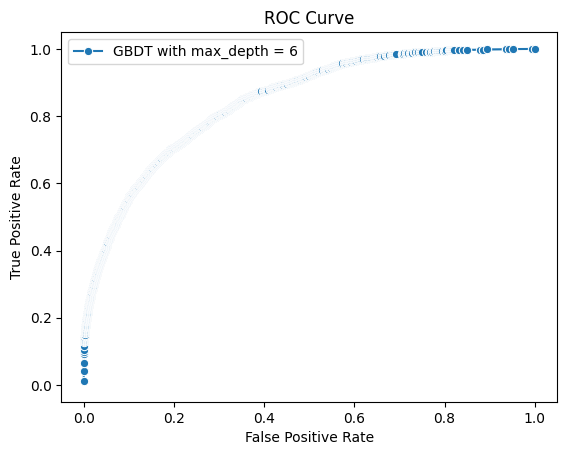

29.65817379951477


In [52]:
import time

t0 = time.time()

fig = plt.figure()
ax= fig.add_subplot(111)

sns.lineplot(x=fpr_best, y=tpr_best, marker='o')

plt.title ('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['GBDT with max_depth = 6'])

plt.show()
t1=time.time()

print(t1-t0)

In [51]:
#I found that the model that yielded the best accuracy score was the gradient boosted decision tree with the hyperparemeter max_depth=6
#I also noticed how much time gbdt takes to run as opposed to logistic regression. 
#Additionally I found that during logistic regression I ended up having to scale my features because I kept running into iteration errors.

In [ ]:
#When I used gridsearch to search for the best hyperparameter for logistic regression my accuracy score definitely improved all the way up to .7 vs when it was first .6.